In [1]:
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv ('data.csv')
#from the exercise instructions we know the noice is random and for each x and each collumm

<AxesSubplot:xlabel='A', ylabel='C'>

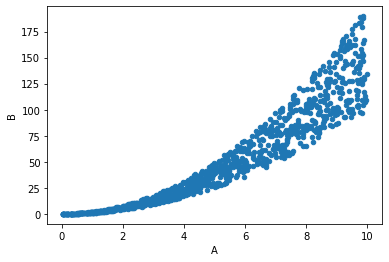

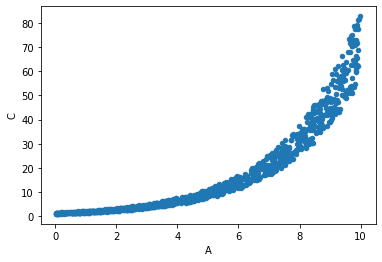

In [3]:
df.plot(x='A', y='B', kind='scatter')
df.plot(x='A', y='C', kind='scatter')
# from the plots bellow we can see some curvature so the  Fb
# and Fc probably will be polynomial functions

In [4]:
x , yb , yc = df['A'].values , df['B'].values , df['C'].values
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#Fb
polyb = PolynomialFeatures(degree=3, include_bias=False)
poly_featuresb = polyb.fit_transform(x.reshape(-1, 1))
X_trainb, X_testb, y_trainb, y_testb = train_test_split(poly_featuresb, yb,test_size=0.33, random_state=42)

#Fc
polyc = PolynomialFeatures(degree=10, include_bias=False)
poly_featuresc = polyc.fit_transform(x.reshape(-1, 1))
X_trainc, X_testc, y_trainc, y_testc = train_test_split(poly_featuresc, yc,test_size=0.33, random_state=42)


In [5]:
#Fb
poly_reg_modelb = LinearRegression()
poly_reg_modelb.fit(X_trainb, y_trainb)
#Fc
poly_reg_modelc = LinearRegression()
poly_reg_modelc.fit(X_trainc, y_trainc)

LinearRegression()

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
#Fb
poly_reg_y_predictedb = poly_reg_modelb.predict(X_testb)
poly_reg_mseb = np.sqrt(mean_squared_error(y_testb, poly_reg_y_predictedb))
#Fc
poly_reg_y_predictedc = poly_reg_modelc.predict(X_testc)
poly_reg_msec = np.sqrt(mean_squared_error(y_testc, poly_reg_y_predictedc))

In [7]:
print("Approx Function B coefficients")
print(poly_reg_modelb.coef_)
print("Approx Function C coefficients")
print(poly_reg_modelc.coef_)

Approx Function B coefficients
[-0.45566134  1.70214236 -0.01897374]
Approx Function C coefficients
[-2.58439450e+00  9.30786290e+00 -1.20221786e+01  8.33648787e+00
 -3.36578075e+00  8.31030697e-01 -1.26933697e-01  1.16888372e-02
 -5.94109470e-04  1.27939534e-05]


In [8]:
print("Score for Fb is:")
print(r2_score(y_testb,poly_reg_y_predictedb))
print("Score for Fc is:")
print(r2_score(y_testc,poly_reg_y_predictedc))

Score for Fb is:
0.9340057316168555
Score for Fc is:
0.9732656320623336


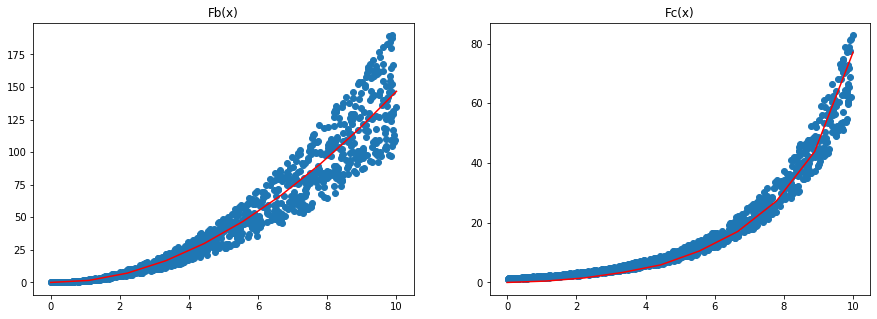

In [9]:
import numpy as np
from matplotlib import pyplot as plt
fig, (plt1,plt2) = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
plt1.title.set_text('Fb(x)')
#Fb
x_predb= np.linspace(0, 10, 10)
y_predb = 0
for i in range(len(poly_reg_modelb.coef_)):
    y_predb +=  poly_reg_modelb.coef_[i]*x_predb**(i+1) 
plt1.scatter(x, yb)
plt1.plot(x_predb,y_predb,label = "predicted",color='red')

#Fc
plt2.title.set_text('Fc(x)')
x_predc= np.linspace(0, 10, 10)
y_predc = 0
for i in range(len(poly_reg_modelc.coef_)):
    y_predc +=  poly_reg_modelc.coef_[i]*x_predc**(i+1) 
plt2.scatter(x, yc)
plt2.plot(x_predc,y_predc,label = "predicted",color='red')

plt.show()